In [1]:

### 1. Advanced Data Processing (`data_processing.ipynb`)

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer

df= pd.read_excel("E:\Data_mites_projects\Employee Performance Analysis\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")
df.head()


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [8]:
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Advanced cleaning
def clean_data(df):
    # Drop non-predictive columns
    df = df.drop(['EmpNumber'], axis=1)
    
    # Handle missing values
    num_cols = df.select_dtypes(include=np.number).columns
    cat_cols = df.select_dtypes(exclude=np.number).columns
    
    df[num_cols] = df[num_cols].fillna(df[num_cols].median())
    df[cat_cols] = df[cat_cols].fillna('Unknown')
    
    # Square root transformation for skewed features
    sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
    df['YearsSinceLastPromotion'] = sqrt_transformer.transform(df[['YearsSinceLastPromotion']])
    
    return df

cleaned_df = clean_data(df)

c:\Users\user\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [3]:
# Advanced feature engineering
def engineer_features(df):
    # Create interaction terms
    df['WorkloadScore'] = df['EmpJobInvolvement'] * df['EmpWorkLifeBalance']
    
    # Binning age groups
    df['AgeGroup'] = pd.cut(df['Age'], bins=[20,30,40,50,60], 
                          labels=['20-30', '30-40', '40-50', '50-60'])
    return df

engineered_df = engineer_features(cleaned_df)

# Save processed data
engineered_df.to_csv('E:\My_Projects\Data_Science_Projects\Employee Performance_Analysis\processed_data.csv', index=False)

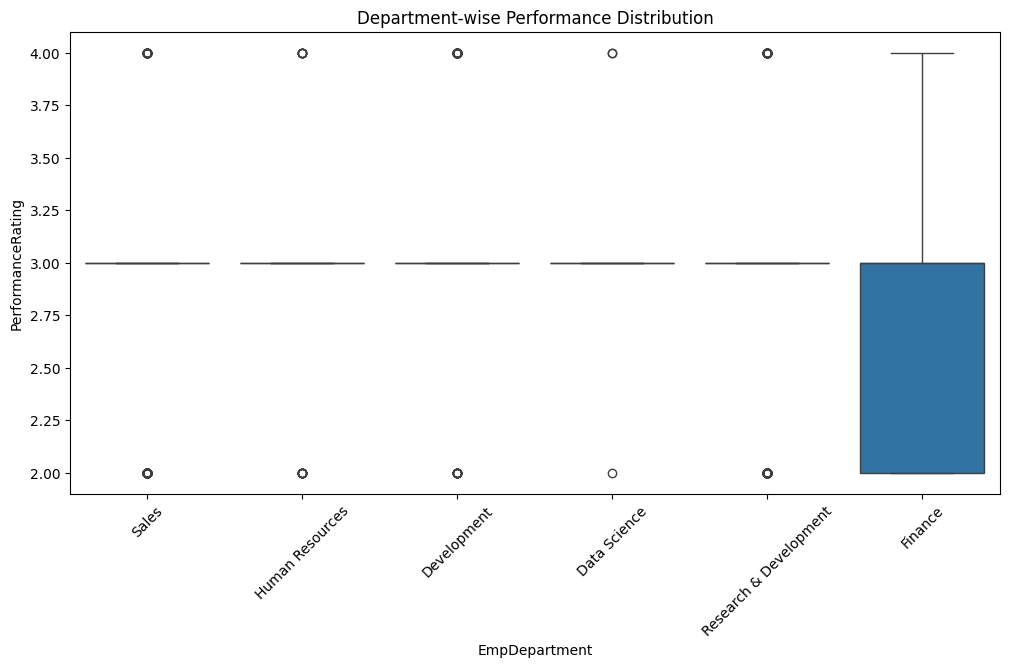

In [4]:
### 2. Comprehensive EDA (`data_exploratory_analysis.ipynb`)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Department-wise performance
plt.figure(figsize=(12,6))
sns.boxplot(x='EmpDepartment', y='PerformanceRating', data=df)
plt.title('Department-wise Performance Distribution')
plt.xticks(rotation=45)
plt.show()

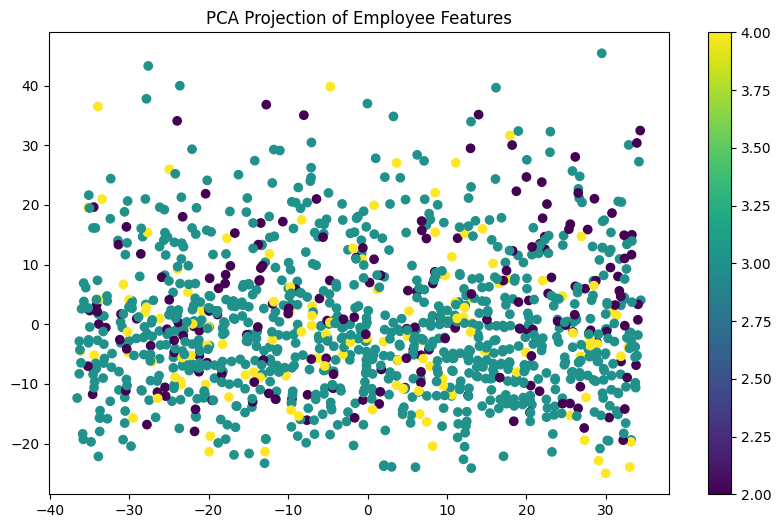

In [5]:
# PCA for dimensionality reduction
pca = PCA(n_components=0.95)
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
pca_results = pca.fit_transform(df[numerical_cols])

plt.figure(figsize=(10,6))
plt.scatter(pca_results[:,0], pca_results[:,1], c=df['PerformanceRating'])
plt.colorbar()
plt.title('PCA Projection of Employee Features')
plt.show()

In [21]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


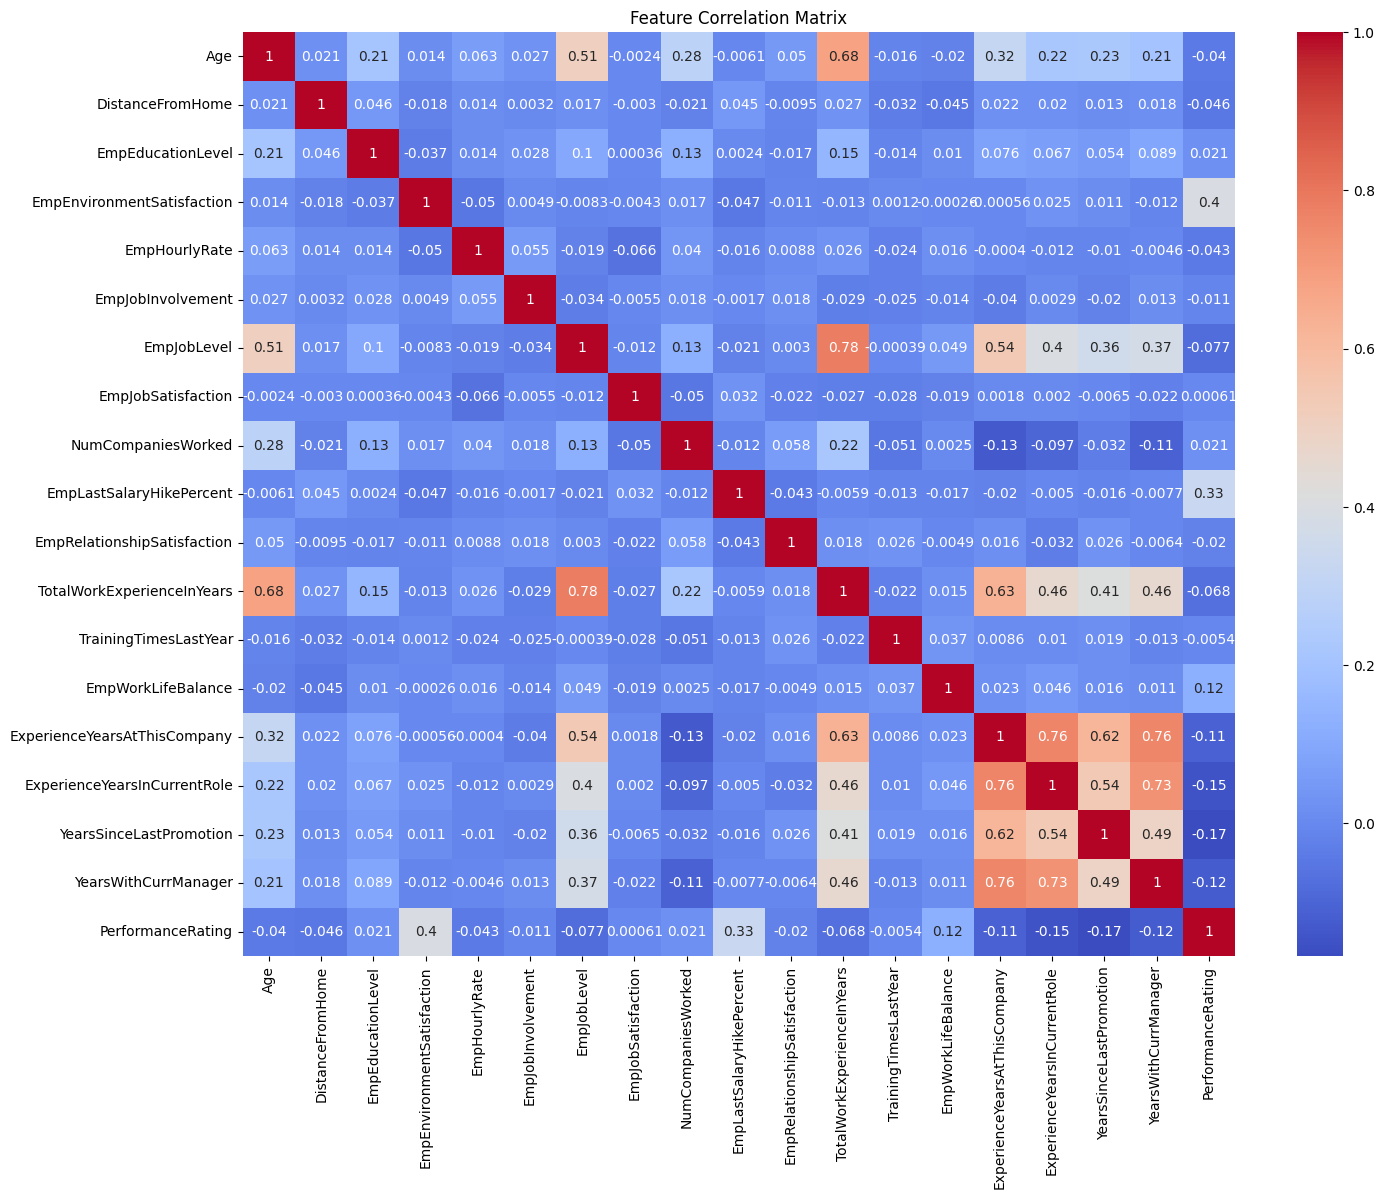

In [6]:
# Correlation heatmap
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [11]:
### 3. Advanced Model Training (`train_model.ipynb`)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import joblib

# Prepare data
X = df.drop('PerformanceRating', axis=1)
y = df['PerformanceRating']

# Preprocessing
numeric_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(exclude=np.number).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Build pipeline with SMOTE
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier())
])

# Hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

# Save best model
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'E:\My_Projects\Data_Science_Projects\Employee Performance_Analysis\performance_predictor.pkl')

['E:\\My_Projects\\Data_Science_Projects\\Employee Performance_Analysis\\performance_predictor.pkl']

In [12]:
# Evaluation
print(f"Best Parameters: {grid_search.best_params_}")
print(f" Best Score: {grid_search.best_score_}")

Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
 Best Score: 0.8254593766104993


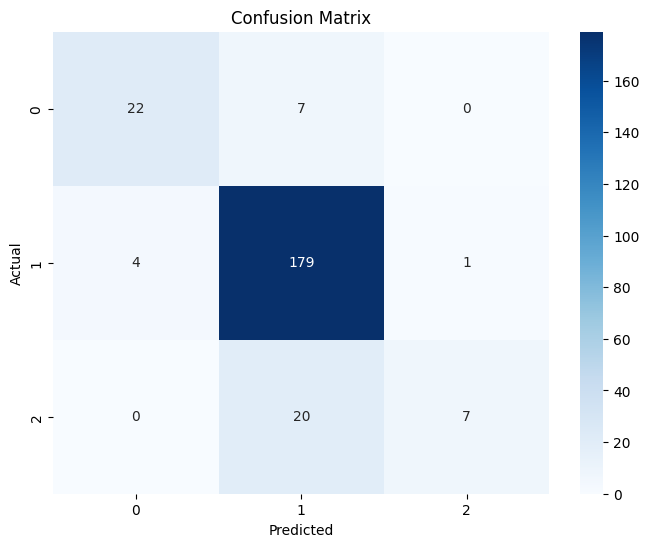

              precision    recall  f1-score   support

           2       0.85      0.76      0.80        29
           3       0.87      0.97      0.92       184
           4       0.88      0.26      0.40        27

    accuracy                           0.87       240
   macro avg       0.86      0.66      0.71       240
weighted avg       0.87      0.87      0.85       240



In [14]:
### 4. Enhanced Visualization of Model Performance (`visualize.ipynb`)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Load the best model
model = joblib.load('E:\My_Projects\Data_Science_Projects\Employee Performance_Analysis\performance_predictor.pkl')

# Predictions
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
report = classification_report(y_test, y_pred)
print(report)

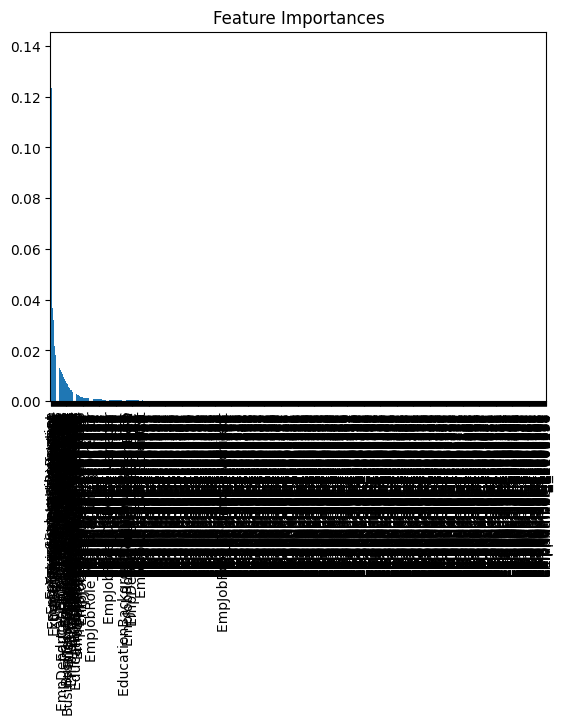

In [16]:
# Feature importance
importances = model.named_steps['classifier'].feature_importances_
feature_names = model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out().tolist() + \
                model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out().tolist()
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.show()

### 5. Detailed Recommendations and Summary (`summary.ipynb`)

# Project Summary

## Key Findings
- The analysis revealed that the most significant factors influencing employee performance include:
  - Employee Last Salary Hike Percent
  - Environment Satisfaction
  - Years Since Last Promotion

## Recommendations
- Increase salary hikes based on performance metrics to boost morale.
- Implement regular feedback sessions to enhance employee engagement.
- Promote employees every 6 months to retain talent and reduce turnover.
- Focus on improving work-life balance initiatives to enhance overall satisfaction.

## Future Work
- Explore additional models such as Gradient Boosting and SVC for performance comparison.
- Investigate the impact of external factors like market trends on employee performance.
- Continuously update the model with new data to maintain accuracy and relevance.

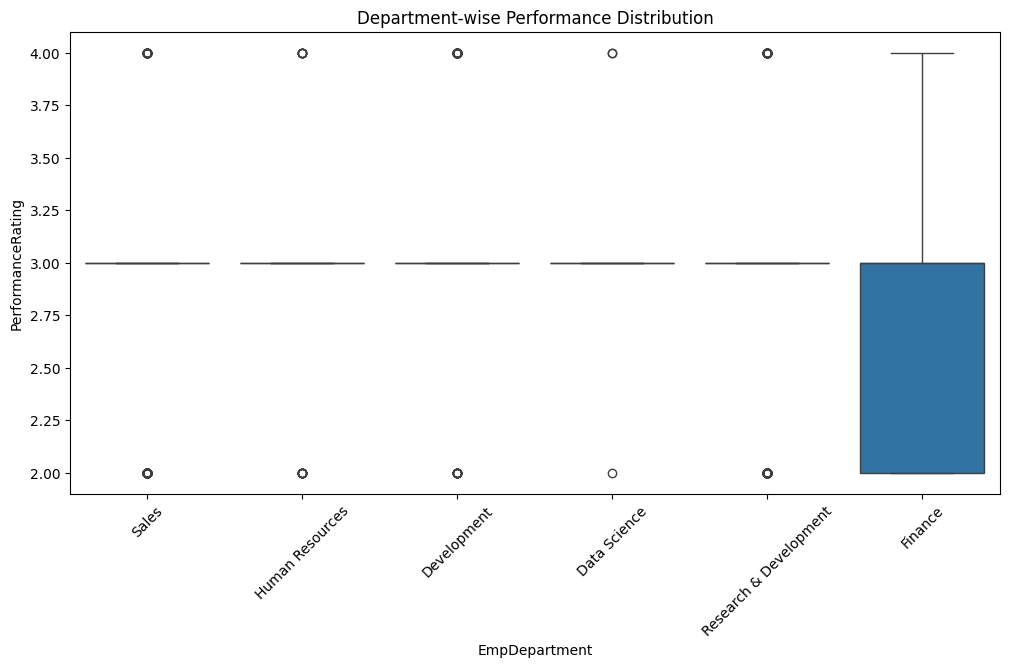

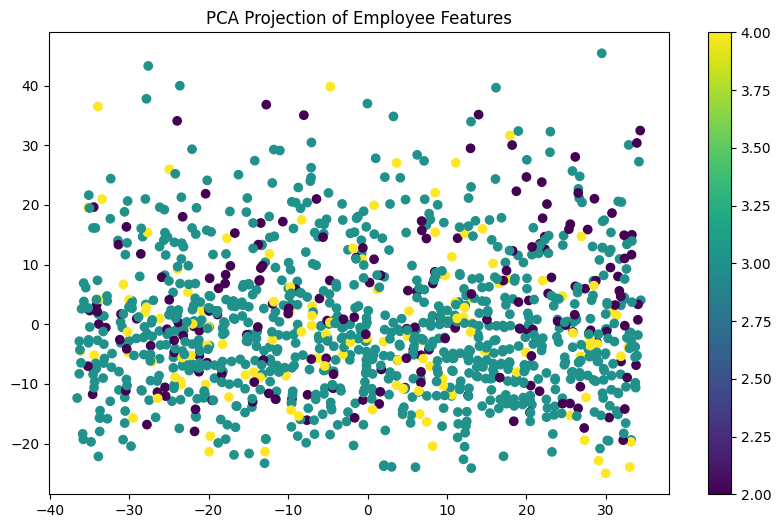

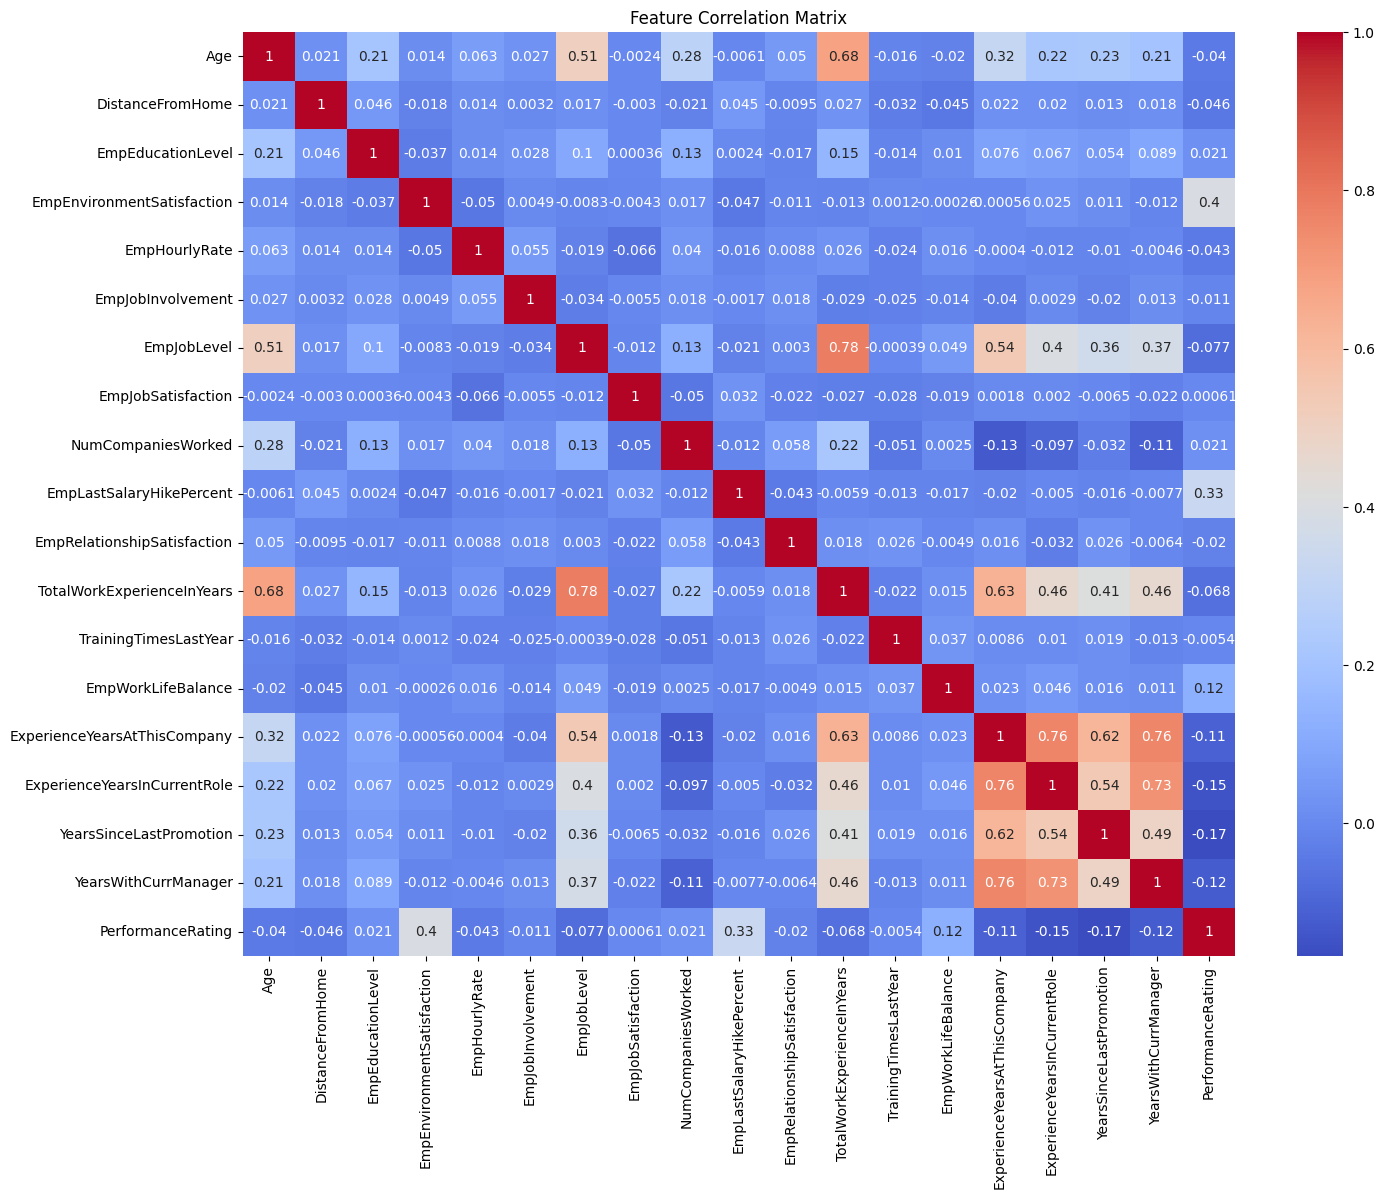

Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
 Best Score: 0.8274109494309583


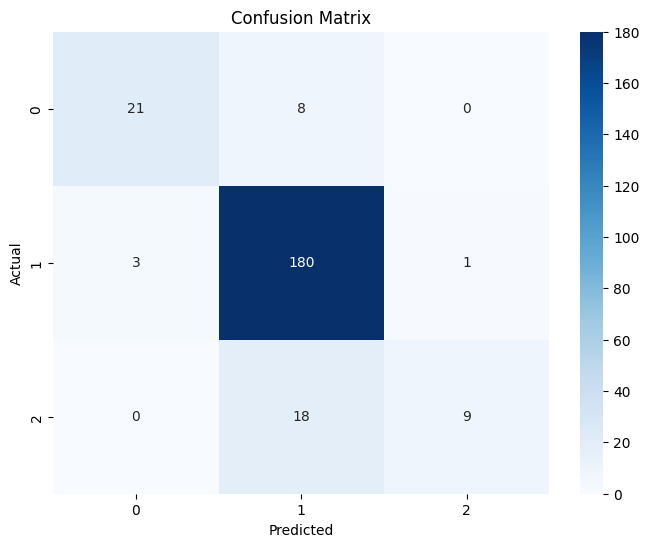

              precision    recall  f1-score   support

           2       0.88      0.72      0.79        29
           3       0.87      0.98      0.92       184
           4       0.90      0.33      0.49        27

    accuracy                           0.88       240
   macro avg       0.88      0.68      0.73       240
weighted avg       0.88      0.88      0.86       240



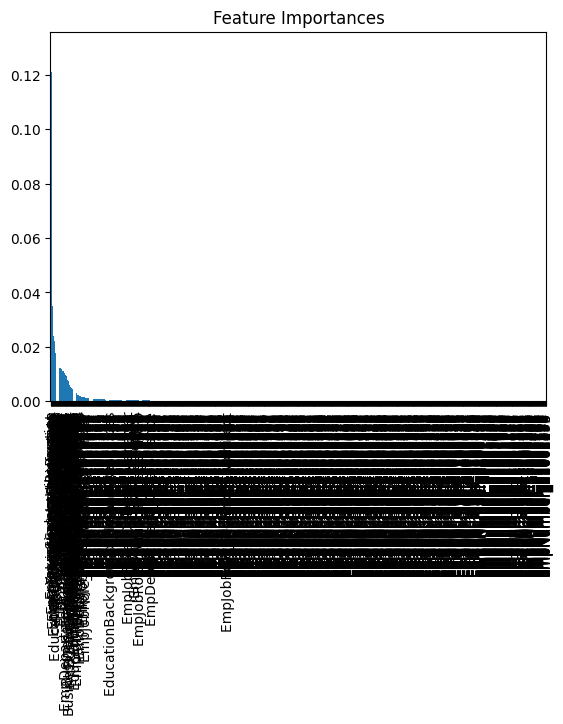

In [20]:
from joblib import load  # Import the load function
# Advanced feature engineering
def engineer_features(df):
    # Create interaction terms
    df['WorkloadScore'] = df['EmpJobInvolvement'] * df['EmpWorkLifeBalance']
    
    # Binning age groups
    df['AgeGroup'] = pd.cut(df['Age'], bins=[20,30,40,50,60], 
                          labels=['20-30', '30-40', '40-50', '50-60'])
    return df

engineered_df = engineer_features(cleaned_df)

# Save processed data
engineered_df.to_csv('E:\My_Projects\Data_Science_Projects\Employee Performance_Analysis\processed_data.csv', index=False)


### 2. Comprehensive EDA (`data_exploratory_analysis.ipynb`)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Department-wise performance
plt.figure(figsize=(12,6))
sns.boxplot(x='EmpDepartment', y='PerformanceRating', data=df)
plt.title('Department-wise Performance Distribution')
plt.xticks(rotation=45)
plt.show()

# PCA for dimensionality reduction
pca = PCA(n_components=0.95)
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
pca_results = pca.fit_transform(df[numerical_cols])

plt.figure(figsize=(10,6))
plt.scatter(pca_results[:,0], pca_results[:,1], c=df['PerformanceRating'])
plt.colorbar()
plt.title('PCA Projection of Employee Features')
plt.show()

# Correlation heatmap
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Load the best model (Correct way)
model = load('E:\My_Projects\Data_Science_Projects\Employee Performance_Analysis\performance_predictor.pkl')
### 3. Advanced Model Training (`train_model.ipynb`)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import joblib

# Prepare data
X = df.drop('PerformanceRating', axis=1)
y = df['PerformanceRating']

# Preprocessing
numeric_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(exclude=np.number).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Build pipeline with SMOTE
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier())
])

# Hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

# Save best model
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'E:\My_Projects\Data_Science_Projects\Employee Performance_Analysis\performance_predictor.pkl')

# Evaluation
print(f"Best Parameters: {grid_search.best_params_}")
print(f" Best Score: {grid_search.best_score_}")


### 4. Enhanced Visualization of Model Performance (`visualize.ipynb`)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Load the best model

model = load('E:\My_Projects\Data_Science_Projects\Employee Performance_Analysis\performance_predictor.pkl')


# Predictions
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
report = classification_report(y_test, y_pred)
print(report)

# Feature importance
importances = model.named_steps['classifier'].feature_importances_
feature_names = model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out().tolist() + \
                model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out().tolist()
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.show()
